<a href="https://colab.research.google.com/github/Ahmad20/kNN/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import math
import statistics as stat
from itertools import chain

In [124]:
data = pd.read_csv("Diabetes.csv", delimiter=',')
x=data.drop("Outcome", axis =1)
y=data["Outcome"]
b=x.values.tolist()
a=data.values.tolist()
ab=pd.Series(a)
aa=pd.Series(b)

In [125]:
def fold_data(data,a,b,c=0,d=0):
  r1=range(a,b)
  r2=range(c,d)
  rd=range(len(data))
  train_list=list(chain(r1,r2))
  test_list=[i for i in rd if i not in train_list]
  return train_list

In [126]:
train1=fold_data(data,0,614)
test1=[i for i in range(len(data)) if i not in train1]

train2=fold_data(data,0,461,614,768)
test2=[i for i in range(len(data)) if i not in train2]

train3=fold_data(data,0,307,461,768)
test3=[i for i in range(len(data)) if i not in train3]

train4=fold_data(data,0,154,307,768)
test4=[i for i in range(len(data)) if i not in train4]

train5=fold_data(data,154,768)
test5=[i for i in range(len(data)) if i not in train5]

train_all=train1,train2,train3,train4,train5
test_all=test1,test2,test3,test4,test5

In [127]:
def test_fold(ab, test_all, train_all,k):
  pre=[]
  acr=[]
  for i in range(5):
    for j in train_all[i]:
      pred = predict_classification(ab[test_all[i]], ab[j],k)
      pre.append(pred)
    acy=accuracy(pre,y)
    acr.append(acy)
    pre=[]  
  return stat.mean(acr)  

In [128]:
def find_k(max_k):
  f_list=[]
  k_list=[]
  for i in range(1,max_k+1):
    f=test_fold(ab, test_all, train_all,i)
    f_list.append(f)
    k_list.append(i)
  return k_list[f_list.index(max(f_list))],max(f_list)

In [129]:
def find_f(max_k):
  f_list=[]
  k_list=[]
  for i in range(1,max_k+1):
    f=test_fold(ab, test_all, train_all,i)
    f_list.append(f)
    k_list.append(i)
  return f_list

In [130]:
#Euclidean Distance
def euclidean_distance(row1,row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += pow((row1[i] - row2[i]),2)
	return math.sqrt(distance)

In [131]:
#Neighbours
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [132]:
#Prediction
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [133]:
#Accuracy
def accuracy(output,outcome):
  add=0
  for i in range(len(output)):
    if output[i] == outcome[i]:
      add=add+1
    i=i+1
  acc = add/len(output)*100
  return acc

In [134]:
#Output
k=find_k(40)
print("k =",k[0],"and accuracy of k=",k[0],"is",k[1])

k = 40 and accuracy of k= 40 is 64.97508010910728


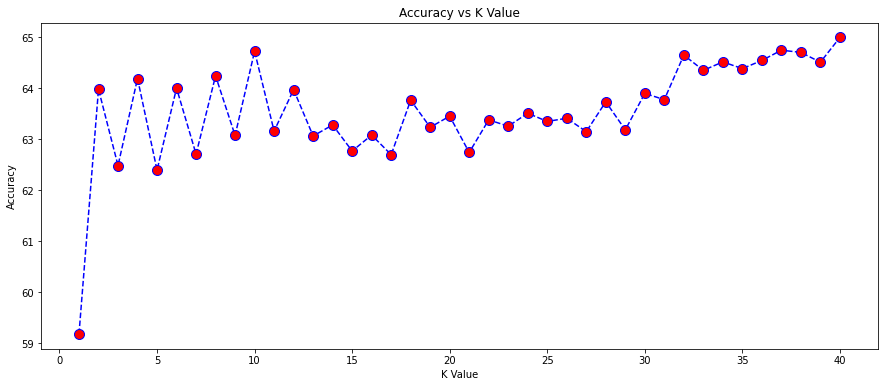

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.plot(range(1,41),f,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)